In [28]:
import yfinance as yf
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [6]:
Walt_Disney = yf.download(tickers = 'DIS', start = "2023-01-01", end = "2023-04-30", rounding = True)

[*********************100%***********************]  1 of 1 completed


In [7]:
Walt_Disney

Price,Close,High,Low,Open,Volume
Ticker,DIS,DIS,DIS,DIS,DIS
Date,,,,,
2023-01-03,87.88,88.87,86.76,87.89,14997100
2023-01-04,90.86,91.62,88.27,88.90,14957200
2023-01-05,90.80,91.35,89.41,90.54,11622600
2023-01-06,92.77,93.53,90.21,91.53,9828100
2023-01-09,93.61,94.53,92.31,93.28,11675800
...,...,...,...,...,...
2023-04-24,98.46,99.51,97.47,98.93,8540600
2023-04-25,96.81,98.49,96.81,98.17,6511400


In [8]:
Walt_Disney = Walt_Disney['Close']

In [9]:
Walt_Disney

Ticker,DIS
Date,
2023-01-03,87.88
2023-01-04,90.86
2023-01-05,90.80
2023-01-06,92.77
2023-01-09,93.61
...,...
2023-04-24,98.46
2023-04-25,96.81
2023-04-26,95.43


In [10]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test = train_test_split(Walt_Disney['DIS'], test_size = 0.3, shuffle=False)

[ 1.00000000e+00  9.24753965e-01  8.55183292e-01  7.84002048e-01
  7.12408517e-01  6.31013816e-01  5.43952551e-01  4.50962815e-01
  3.78096824e-01  2.91761794e-01  1.87551462e-01  9.35109287e-02
 -2.55487078e-04 -8.06705455e-02 -1.48385199e-01 -2.20188104e-01
 -2.79893582e-01 -3.31430390e-01]


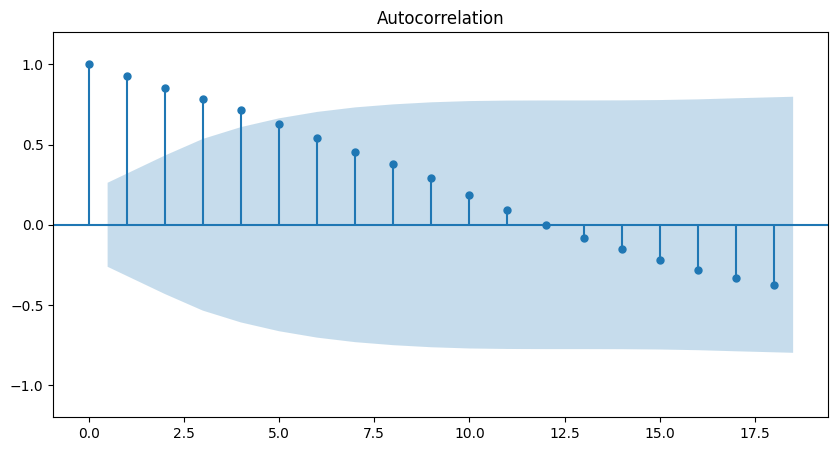

In [26]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

acf_train = acf(x_train)
print(acf_train)

fig, ax = plt.subplots(figsize=(10, 5))  # Ajusta el tamaño de la figura
plot_acf(x_train, alpha=0.05, ax=ax)
plt.ylim(-1.2, 1.2)
plt.show()

El mejor valor de p según el AIC es: 1


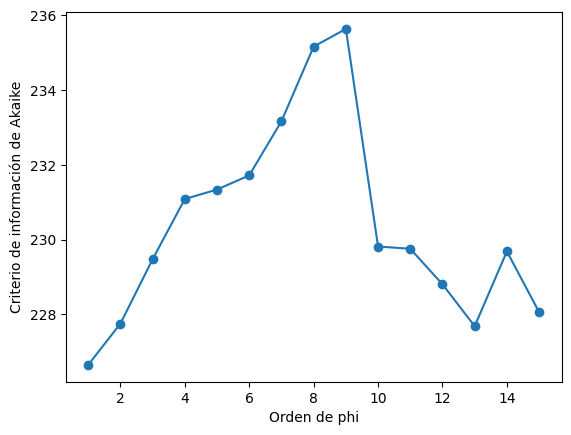

In [38]:
import numpy as np
import statsmodels.api as sm

def seleccionar_p_con_aic(serie, max_p=10):
    AIC = []
    for p in range(1, max_p + 1):
        modelo = sm.tsa.ARIMA(serie, order=(p, 0, 0)).fit()
        AIC.append((p, modelo.aic))
    
    mejor_p = min(AIC, key=lambda x: x[1])[0]  # Selecciona el p con menor AIC


    plt.plot(range(1, max_p+1), [aic[1] for aic in AIC], marker = 'o')
    plt.xlabel('Orden de phi')
    plt.ylabel('Criterio de información de Akaike')


    return mejor_p

# Uso de la función
p_optimo = seleccionar_p_con_aic(x_train, max_p=15)
print(f"El mejor valor de p según el AIC es: {p_optimo}")

El mejor valor de p según el AIC es: 1


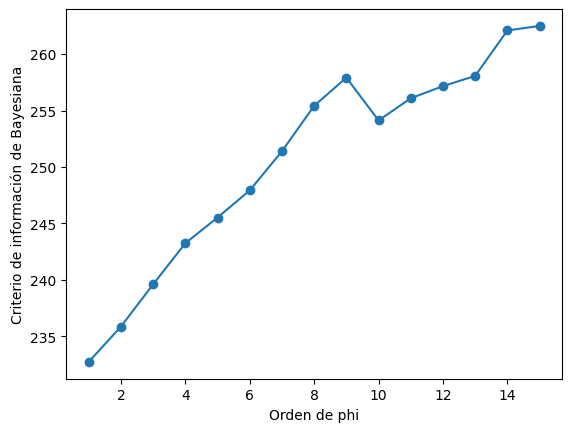

In [37]:
def seleccionar_p_con_bic(serie, max_p=10):
    BIC = []
    for p in range(1, max_p + 1):
        modelo = sm.tsa.ARIMA(serie, order=(p, 0, 0)).fit()
        BIC.append((p, modelo.bic))
    
    mejor_p = min(BIC, key=lambda x: x[1])[0]  # Selecciona el p con menor AIC


    plt.plot(range(1, max_p+1), [bic[1] for bic in BIC], marker = 'o')
    plt.xlabel('Orden de phi')
    plt.ylabel('Criterio de información de Bayesiana')


    return mejor_p

# Uso de la función
p_optimo = seleccionar_p_con_bic(x_train, max_p=15)
print(f"El mejor valor de p según el AIC es: {p_optimo}")

In [41]:
modelo_optimo = sm.tsa.ARIMA(x_train, order=(1, 0, 0)).fit()
print(modelo_optimo.summary())

                               SARIMAX Results                                
Dep. Variable:                    DIS   No. Observations:                   56
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -110.325
Date:                Tue, 27 May 2025   AIC                            226.650
Time:                        14:11:02   BIC                            232.726
Sample:                             0   HQIC                           229.006
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.2791      5.602     17.007      0.000      84.298     106.260
ar.L1          0.9708      0.029     32.934      0.000       0.913       1.029
sigma2         2.8615      0.553      5.176      0.0

In [82]:
predicciones = modelo_optimo.forecast(len(x_test)+30)
predicciones = pd.DataFrame(predicciones).reset_index(drop=True)
predicciones

,predicted_mean
0,94.678093
1,94.695656
2,94.712707
3,94.729259
4,94.745327
5,94.760926
6,94.776069
7,94.790770
8,94.805040
9,94.818894


In [81]:
confianza = modelo_optimo.get_forecast(len(x_test)+30).conf_int(alpha=0.05)
confianza = pd.DataFrame(confianza).reset_index(drop=True)
confianza

,lower DIS,upper DIS
0,91.362647,97.993538
1,90.074915,99.316398
2,89.134743,100.290671
3,88.379942,101.078576
4,87.746464,101.744191
5,87.200836,102.321017
6,86.722794,102.829345
7,86.298891,103.282649
8,85.919614,103.690467
9,85.577914,104.059875


In [72]:
x_test_df = pd.DataFrame(x_test)
x_test_df = x_test_df.reset_index()
x_test_df

,Date,DIS
0,2023-03-24,92.93
1,2023-03-27,94.45
2,2023-03-28,93.66
3,2023-03-29,95.69
4,2023-03-30,96.90
5,2023-03-31,98.91
6,2023-04-03,98.54
7,2023-04-04,98.35
8,2023-04-05,98.69
9,2023-04-06,98.75


In [92]:
predicciones_df = pd.concat([x_test_df, predicciones['predicted_mean']], axis = 1)
predicciones_df = pd.concat([predicciones_df, confianza], axis = 1)
predicciones_df.loc[predicciones_df['Date'].isna(), 'Date'] = pd.date_range(start=predicciones_df['Date'].dropna().iloc[-1] + pd.Timedelta(days=1), 
              periods=predicciones_df['Date'].isna().sum(), freq='D')

predicciones_df

,Date,DIS,predicted_mean,lower DIS,upper DIS
0,2023-03-24,92.93,94.678093,91.362647,97.993538
1,2023-03-27,94.45,94.695656,90.074915,99.316398
2,2023-03-28,93.66,94.712707,89.134743,100.290671
3,2023-03-29,95.69,94.729259,88.379942,101.078576
4,2023-03-30,96.90,94.745327,87.746464,101.744191
5,2023-03-31,98.91,94.760926,87.200836,102.321017
6,2023-04-03,98.54,94.776069,86.722794,102.829345
7,2023-04-04,98.35,94.790770,86.298891,103.282649
8,2023-04-05,98.69,94.805040,85.919614,103.690467
9,2023-04-06,98.75,94.818894,85.577914,104.059875


In [105]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predicciones_df['DIS'][0:25], predicciones_df['predicted_mean'][0:25])
print(f"MSE: {mse:.4f}")

mape = np.mean(np.abs((predicciones_df['DIS'][0:25] - predicciones_df['predicted_mean'][0:25]) / predicciones_df['DIS'][0:25])) * 100
print(f"MAPE: {mape:.2f}%")


MSE: 11.9302
MAPE: 3.16%


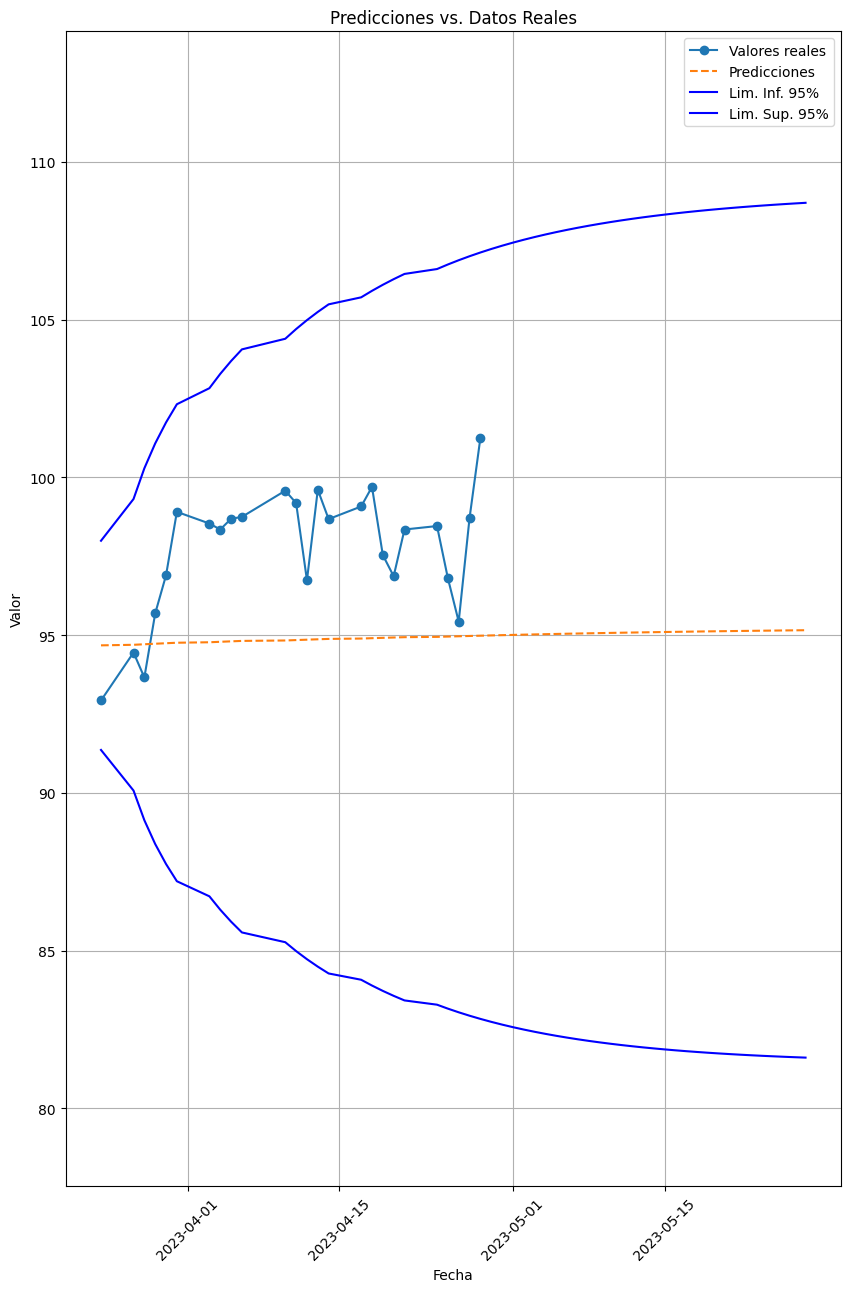

In [103]:
# Graficar datos reales y predicciones
plt.figure(figsize=(10, 15))
plt.plot(predicciones_df['Date'], predicciones_df['DIS'], label="Valores reales", marker="o")
plt.plot(predicciones_df['Date'], predicciones_df['DIS'], label="Valores reales", marker="o")
plt.plot(predicciones_df['Date'], predicciones_df['predicted_mean'], label="Predicciones", linestyle="--")
plt.plot(predicciones_df['Date'], predicciones_df['lower DIS'], label="Lim. Inf. 95%", color="blue")
plt.plot(predicciones_df['Date'], predicciones_df['upper DIS'], label="Lim. Sup. 95%", color="blue")


# Mejorar visualización
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.ylim(min(predicciones_df['lower DIS']) - min(.05*predicciones_df['lower DIS']) , max(predicciones_df['upper DIS']) + max(.05*predicciones_df['upper DIS']))
plt.title("Predicciones vs. Datos Reales")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas de fecha para mejor visibilidad
plt.grid()

# Mostrar el gráfico
plt.show()


### Como se puede observar el mejor valor de Phi para el modelo autoregresivo es de 1 utilizando como criterio de evaluación el akaike y el bayesiano, también al graficar las predicciones con los intervalos de confianza es que las acciones fueron a la alza en este periodo y aunque es muy amplio el margen de error la predicción nos dice que las acciones seguirán subiendo. 